<a href="https://colab.research.google.com/github/unisttt/open-implementation/blob/master/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [0]:
df = pd.read_csv("ex2data2.csv", header=None, sep=",")

In [104]:
df.head()

,0,1,2
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [105]:
# df => numpy
matrix = df.values
m, n = matrix.shape
print(matrix[:5])
print("({} {})".format(m, n))
print(matrix.size)

[[ 0.051267  0.69956   1.      ]
 [-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]]
(118 3)
354


In [0]:
X = matrix[:, [0, 1]]
y = matrix[:, 2]
y.shape = (y.size, 1)

In [0]:
def createDataset():
  X = matrix[:, [0, 1]]
  y = matrix[:, 2]
  y.shape = (y.size, 1)
  return X, y

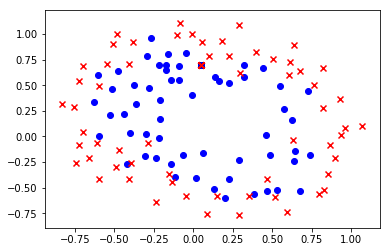

In [108]:
def plotData(X, y):
  pos = np.where(y == 1)
  neg = np.where(y == 0)
  plt.scatter(X[pos, 0], X[pos, 1], marker="o", c="b")
  plt.scatter(X[neg, 0], X[neg, 1], marker="x", c="r")

plotData(X, y)

In [0]:
def sigmoid(x):
  return (1 / (1 + np.exp(-x)))

In [110]:
def mapfeature(x1, x2):
  x1.shape = (x1.size, 1)
  x2.shape = (x2.size, 1)
  
  degree = 6
  out = np.ones((x1.size, 1))
  for i in range(1, degree + 1):
    for j in range(0, i+1):
      r = x1 ** (i - j) * x2 ** j
      out = np.append(out, r, axis=1)
      
  return out

# mapfeature(X[:, 0], X[:, 1])
X = mapfeature(X[:, 0], X[:, 1])
m, n = X.shape
print(X.shape)
print(X[0])

(118, 28)
[1.00000000e+00 5.12670000e-02 6.99560000e-01 2.62830529e-03
 3.58643425e-02 4.89384194e-01 1.34745327e-04 1.83865725e-03
 2.50892595e-02 3.42353606e-01 6.90798869e-06 9.42624411e-05
 1.28625106e-03 1.75514423e-02 2.39496889e-01 3.54151856e-07
 4.83255257e-06 6.59422333e-05 8.99809795e-04 1.22782870e-02
 1.67542444e-01 1.81563032e-08 2.47750473e-07 3.38066048e-06
 4.61305487e-05 6.29470940e-04 8.58939846e-03 1.17205992e-01]


In [111]:
initial_theta = np.zeros((n, 1))
print(initial_theta.shape)

(28, 1)


In [0]:
def costFunctionReg(theta, X, y, lam):
  m = len(y)
  J = 0
  grad = np.zeros(np.shape(theta))
  
  h_theta = sigmoid(np.dot(X, theta))
  pred1 = -1 * np.dot(y.T, np.log(h_theta))
  pred0 = -1 * np.dot((1 - y).T, np.log(1 - h_theta))
  # theta0はregularizeしないように注意する
  norm = (lam / (2 * m)) * np.dot(theta[1:].T, theta[1:])
  
  J = (1/m) * (pred1 + pred0) + norm
  J.shape = (J.size)    # (1, 1) => (1,)
  
  # X[:, 0] は全て1の列
  grad0 = (1/m) * np.dot(X[:, 0].T, (h_theta - y))
  grad_other = (1/m) * np.dot(X[:, 1:].T, (h_theta - y)) + (lam / m) * theta[1:]
  grad = np.append(grad0, grad_other)
  grad.shape = (grad.size, 1)    # (28,) => (28, 1)
#   print(grad.shape)
  
  return J, grad

lam = 1
cost , grad = costFunctionReg(initial_theta, X, y, lam)

In [113]:
print(cost)
print(grad[:3])

[0.69314718]
[[8.47457627e-03]
 [1.87880932e-02]
 [7.77711864e-05]]


In [114]:
test_theta = np.ones((n, 1))
cost, grad = costFunctionReg(test_theta, X, y, 10)
print(cost)
print(grad[:5])

[3.16450933]
[[0.34604507]
 [0.16135192]
 [0.19479576]
 [0.22686278]
 [0.09218568]]


In [0]:
theta = np.random.randn(n, 1)
epoch = 1000
lr = 0.1
cost_hist = np.array([])

for t in range(epoch):
  cost, grad = costFunctionReg(theta, X, y, 1)
#   cost_hist.append(cost)
  cost_hist = np.append(cost_hist, cost)
  theta -= lr * grad

In [0]:
# cost_hist
# [c for i, c in enumerate(cost_hist) if i %10 == 0]

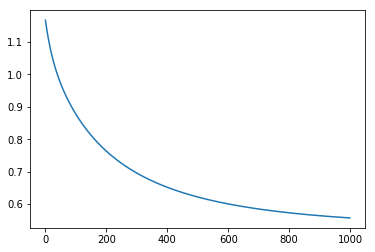

In [117]:
plt.plot(range(epoch), cost_hist)

## Dicision Boundaryを表示させたい

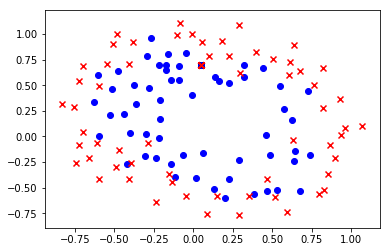

In [118]:
plotData(X[:, 1:3], y)




```
# これはコードとして書式設定されます
function plotDecisionBoundary(theta, X, y)
%PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
%the decision boundary defined by theta
%   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
%   positive examples and o for the negative examples. X is assumed to be 
%   a either 
%   1) Mx3 matrix, where the first column is an all-ones column for the 
%      intercept.
%   2) MxN, N>3 matrix, where the first column is all-ones

% Plot Data
plotData(X(:,2:3), y);
hold on

if size(X, 2) <= 3
    % Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X(:,2))-2,  max(X(:,2))+2];

    % Calculate the decision boundary line
    plot_y = (-1./theta(3)).*(theta(2).*plot_x + theta(1));

    % Plot, and adjust axes for better viewing
    plot(plot_x, plot_y)
    
    % Legend, specific for the exercise
    legend('Admitted', 'Not admitted', 'Decision Boundary')
    axis([30, 100, 30, 100])
else
    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end
hold off

end
```

